In [1]:
#Practical 10

# Classify the email using the binary classification method. Email Spam detection has two									
# states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and									
# Support Vector Machine for classification. Analyze their performance.									
# Dataset link: The emails.csv dataset on the Kaggle									
# https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv									

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df = df.drop('Email No.', axis=1)

In [6]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.shape

(5172, 3001)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [9]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [10]:
x = df.drop('Prediction', axis=1)
y = df['Prediction']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(x_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_pred = neigh.predict(x_test)

In [14]:
neigh.score(x_train, y_train)

0.9564902102973168

In [15]:
neigh.score(x_test, y_test)

0.8618357487922705

In [16]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[656,  57],
       [ 86, 236]])

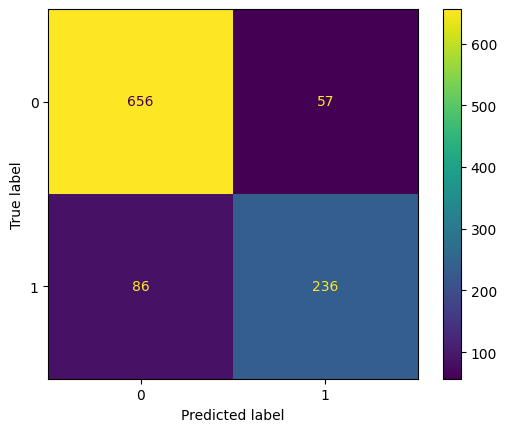

In [17]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [18]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       713
           1       0.81      0.73      0.77       322

    accuracy                           0.86      1035
   macro avg       0.84      0.83      0.83      1035
weighted avg       0.86      0.86      0.86      1035



In [19]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8618357487922705

In [20]:

print("precision_score: ")
precision_score(y_test, y_pred)

precision_score: 


0.8054607508532423

In [21]:

print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.7329192546583851

In [22]:

print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.13816425120772946

In [23]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
y_pred = SVM.predict(x_test)

In [25]:
SVM.score(x_train, y_train)

0.962291515591008

In [26]:
SVM.score(x_test, y_test)

0.9053140096618357

In [27]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[690,  23],
       [ 75, 247]])

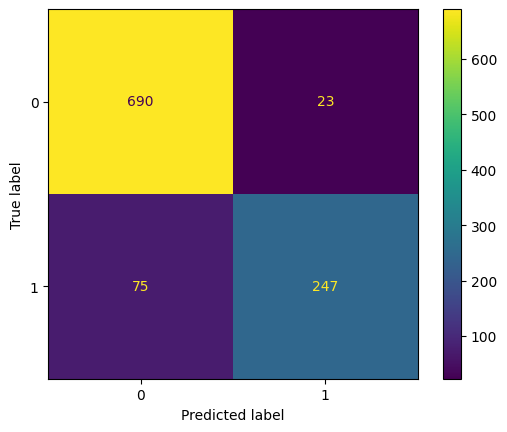

In [28]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       713
           1       0.91      0.77      0.83       322

    accuracy                           0.91      1035
   macro avg       0.91      0.87      0.88      1035
weighted avg       0.91      0.91      0.90      1035

